In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread, imsave
import cPickle as pickle
import yaml
import seaborn as sns
import itertools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
runs = ['mel32_large_test_golden_fullsplit','warblr_challenge_baseline', 'aci_baseline']
classname = 'biotic'


mapper = {'warblr_challenge_baseline': 'bulbul', 
          'mel32_large_test_golden_fullsplit': 'Ours',
          'aci_baseline': 'ACI*'}

In [6]:
base_dir = '/media/michael/Engage/data/audio/alison_data/golden_set/'

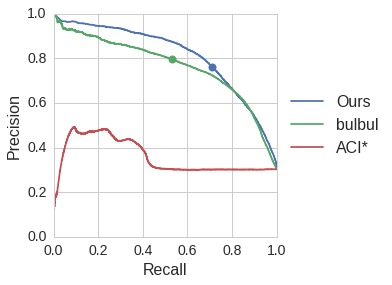

In [15]:
palette = itertools.cycle(sns.color_palette())

ax = plt.subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)


for run_type in runs:
    loaddir = base_dir + 'predictions/%s/%s/analysis/' % (run_type, classname)
    prec, recall, thresholds, prec_at_05, recall_at_05 = pickle.load(open(loaddir + 'pr_results.pkl'))
    
    col = next(palette)
    ax.plot(recall, prec, color=col, label=mapper[run_type])
    ax.plot(recall_at_05, prec_at_05, 'o', ms=8, color=col)


box = ax.get_position()
ax.set_position([box.x0, box.y0 + 0.05, box.width * 0.8, box.height])


plt.xlim(0, 1)
plt.ylim(0, 1)
ax.set_aspect('equal', adjustable='box')
plt.ylabel('Precision', fontsize=16)
plt.xlabel('Recall', fontsize=16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
#ax.set_axis_bgcolor('white')
sns.set_style("whitegrid")

plt.savefig(base_dir + 'analysis/pr.png', dpi=200)
plt.savefig(base_dir + 'analysis/pr.pdf')